<a href="https://colab.research.google.com/github/JustMatthew989/Matvey_Mokritskikh_Repo/blob/main/%D0%94%D0%97_6_%D0%9C%D0%BE%D0%BA%D1%80%D0%B8%D1%86%D0%BA%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ДОМАШНЕЕ ЗАДАНИЕ №6

In [ ]:
#ЗАДАНИЕ №1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
import optuna
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.datasets import load_iris

In [ ]:
df = pd.DataFrame(pd.read_csv(r'C:\Users\snady\.spyder-py3\updated_pollution_dataset.csv'))

df.drop_duplicates(inplace=True)

df.replace('', np.nan, inplace=True)
df.replace([None], np.nan, inplace=True)


for column in df.columns:
    if df[column].nunique() == len(df):
        df.drop(column, axis=1, inplace=True)


X = df.drop('Air Quality', axis=1)
y = df['Air Quality']
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded_train = pd.DataFrame(
    ohe.fit_transform(X_train[categorical_columns]),
    columns=ohe.get_feature_names_out(categorical_columns)
)
X_train = pd.concat([X_train[numerical_columns], encoded_train], axis=1)

encoded_test = pd.DataFrame(
    ohe.transform(X_test[categorical_columns]),
    columns=ohe.get_feature_names_out(categorical_columns)
)
X_test = pd.concat([X_test[numerical_columns], encoded_test], axis=1)

scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

C:\Users\snady\AppData\Local\Temp\ipykernel_22804\3069596181.py:35: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X_train = pd.concat([X_train[numerical_columns], encoded_train], axis=1)
C:\Users\snady\AppData\Local\Temp\ipykernel_22804\3069596181.py:41: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X_test = pd.concat([X_test[numerical_columns], encoded_test], axis=1)


In [ ]:
#ЗАДАНИЕ №2

Accuracy with 5 neighbors: 0.9350


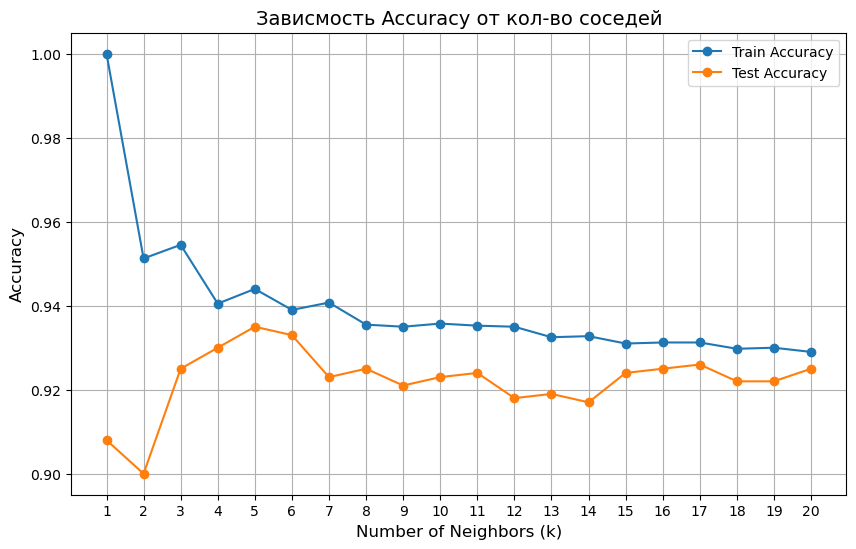

In [ ]:
 knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with 5 neighbors: {accuracy:.4f}")

neighbors = range(1, 21)
train_accuracies = []
test_accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(neighbors, test_accuracies, label='Test Accuracy', marker='o')
plt.title("Зависмость Accuracy от кол-во соседей", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.show()

In [ ]:
#ЗАДАНИЕ №3

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    algorithm = trial.suggest_categorical('algorithm', ['ball_tree', 'kd_tree', 'auto'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    model = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm, metric=metric)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')


    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

best_model = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    algorithm=best_params['algorithm'],
    metric=best_params['metric']
)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

[I 2024-12-24 23:22:22,153] A new study created in memory with name: no-name-436e3ed9-9a32-40ad-8d4c-d6bb5c655111
[I 2024-12-24 23:22:22,273] Trial 0 finished with value: 0.9229986003220066 and parameters: {'n_neighbors': 19, 'algorithm': 'kd_tree', 'metric': 'manhattan'}. Best is trial 0 with value: 0.9229986003220066.
[I 2024-12-24 23:22:22,377] Trial 1 finished with value: 0.8926238576771831 and parameters: {'n_neighbors': 2, 'algorithm': 'kd_tree', 'metric': 'manhattan'}. Best is trial 0 with value: 0.9229986003220066.
[I 2024-12-24 23:22:22,513] Trial 2 finished with value: 0.9252763557913286 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'metric': 'manhattan'}. Best is trial 2 with value: 0.9252763557913286.
[I 2024-12-24 23:22:22,626] Trial 3 finished with value: 0.922235027738602 and parameters: {'n_neighbors': 15, 'algorithm': 'auto', 'metric': 'minkowski'}. Best is trial 2 with value: 0.9252763557913286.
[I 2024-12-24 23:22:22,715] Trial 4 finished with value: 0.907

Best hyperparameters: {'n_neighbors': 5, 'algorithm': 'auto', 'metric': 'euclidean'}
Accuracy: 0.9350
F1 Score: 0.9342
Recall: 0.9350
Precision: 0.9376
